#Part 1

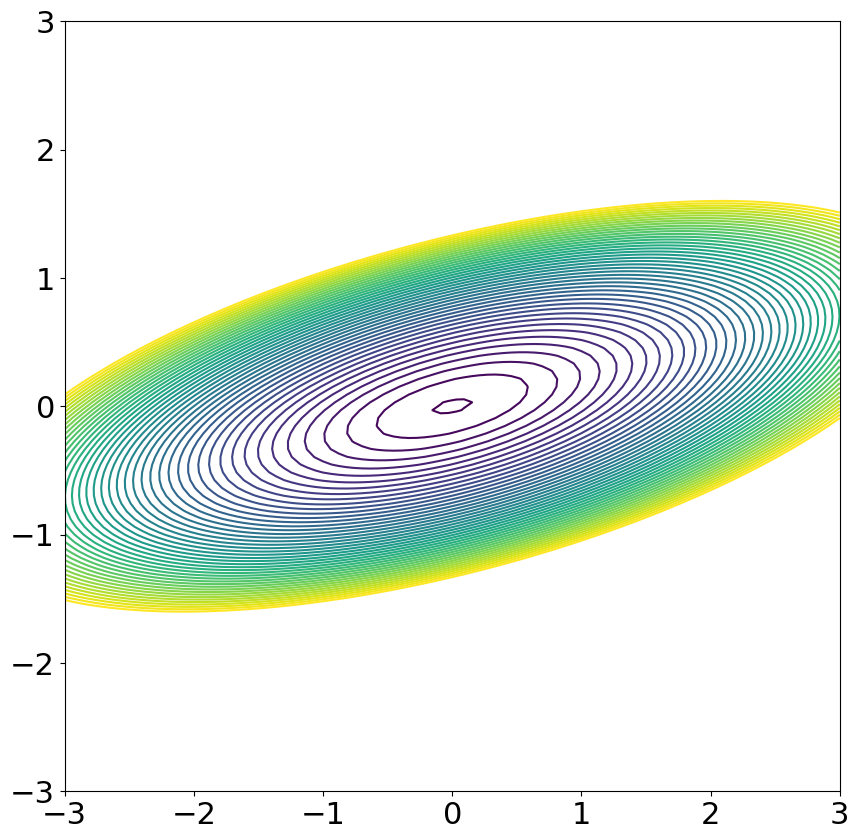

In [22]:
import sys

sys.path.insert(0, "/content/drive/MyDrive/machine_learning/homework")
from grad_desc_utils import *

plot_loss_and_steps(L_func=loss1, positions=[])

## I see a minimum of the loss1 function at coordinates (0,0).

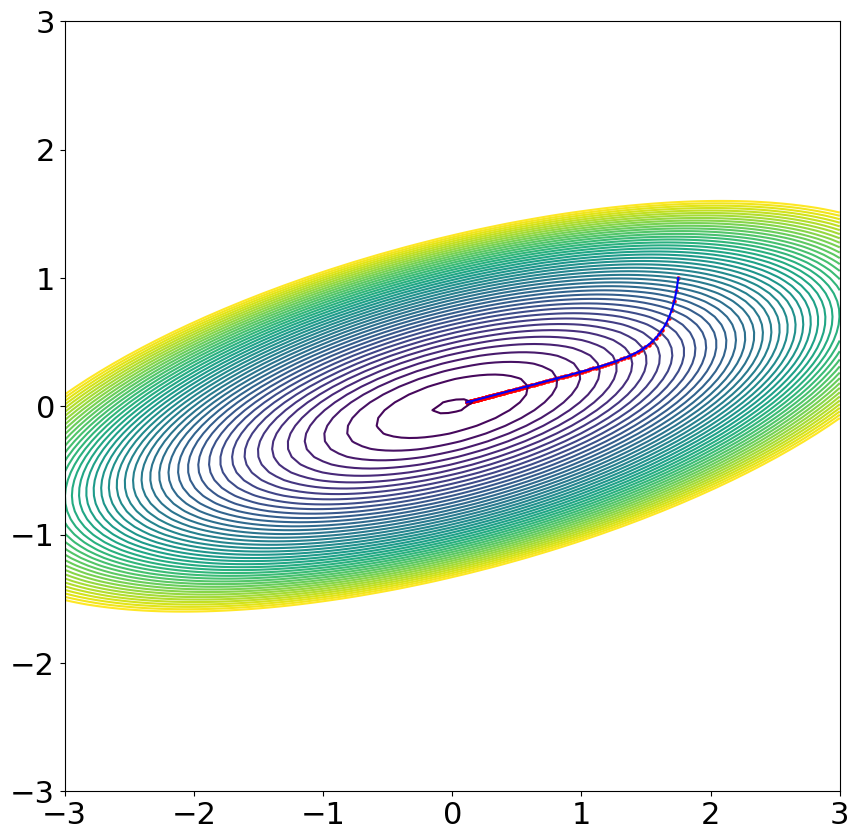

In [23]:
plot_loss_and_steps(L_func=loss1, positions= do_grad_desc(p0 = (1.75, 1.0), L_grad_func=loss1_grad, eta=0.01, n_steps=140))

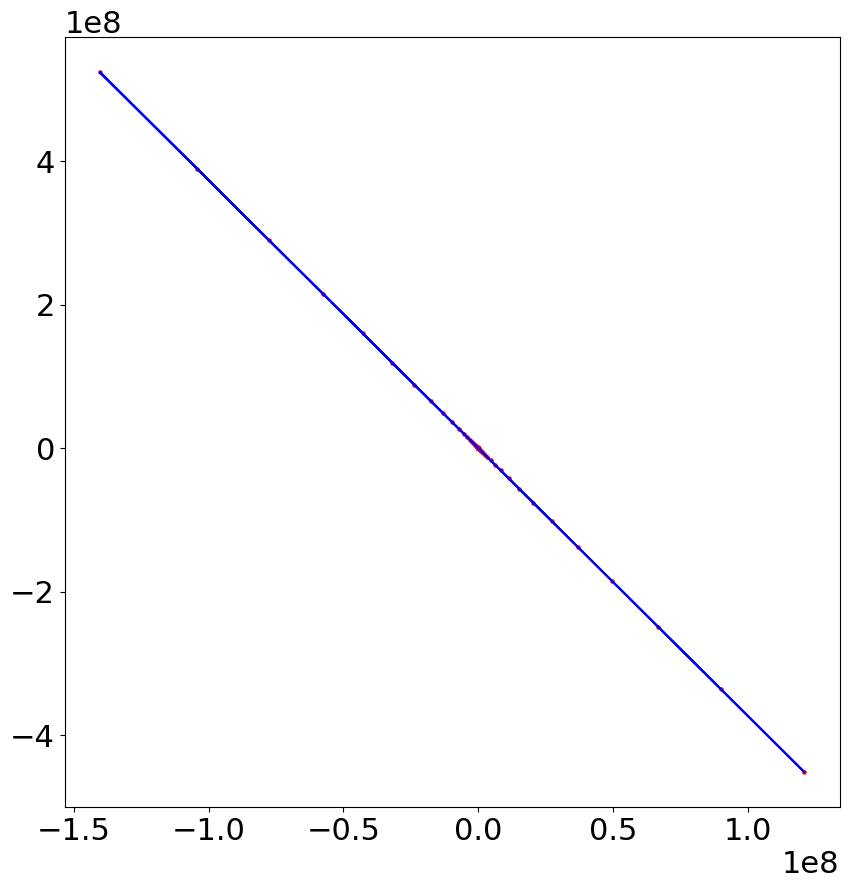

In [24]:
plot_loss_and_steps(L_func=loss1, positions= do_grad_desc(p0 = (1.75, 1.0), L_grad_func=loss1_grad, eta=0.12, n_steps=140))

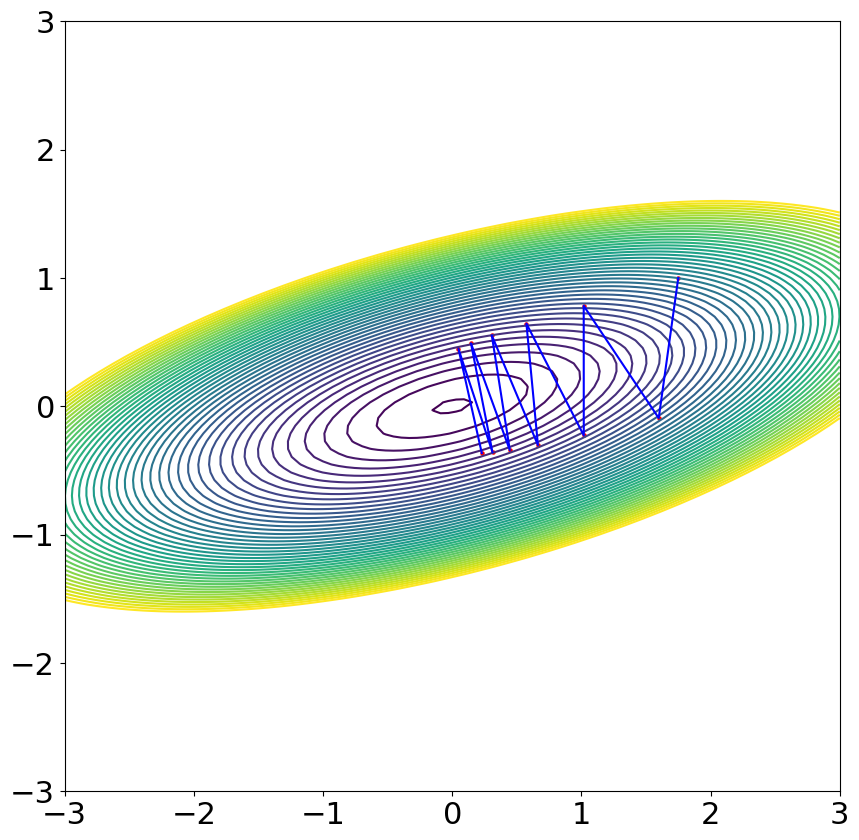

In [25]:
plot_loss_and_steps(L_func=loss1, positions= do_grad_desc(p0 = (1.75, 1.0), L_grad_func=loss1_grad, eta=.11, n_steps=11))

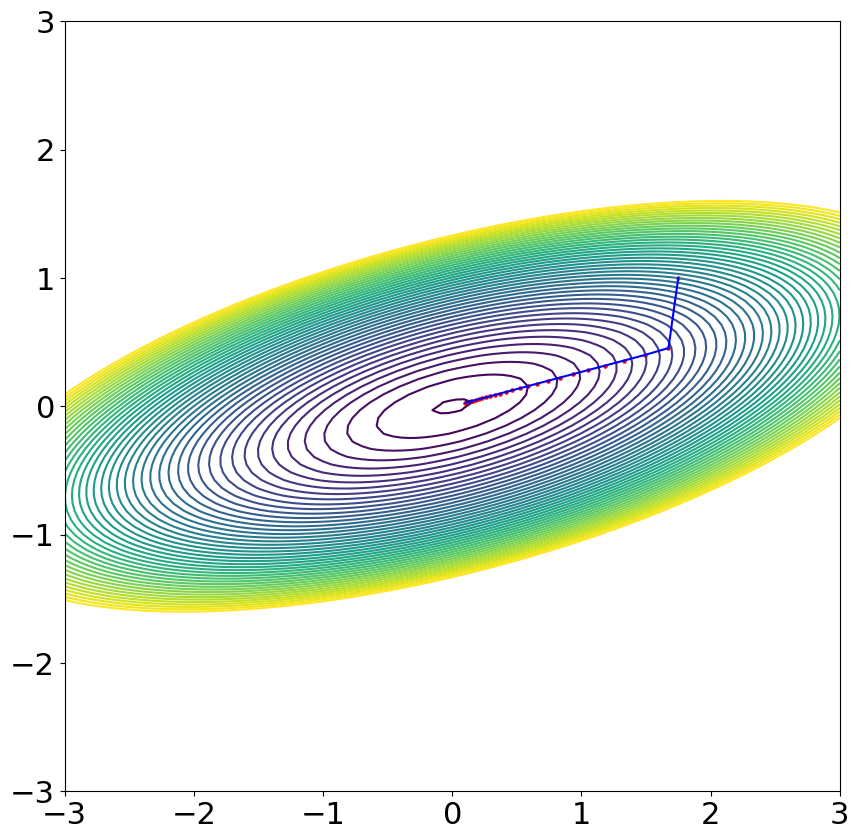

In [26]:
plot_loss_and_steps(L_func=loss1, positions= do_grad_desc(p0 = (1.75, 1.0), L_grad_func=loss1_grad, eta=0.055, n_steps=25))

##The eta and n_steps are inversely related. The convergence rate reaches a minimum with lower eta and high steps or higher eta and lower steps. The fastest convergence at 11 overshoots the minimum. Lower learning rates seem to produce the best optimum although it is slower.

```
Innermost contour:
eta=0.055, n_steps=25
eta=0.11, n_steps=11
eta=0.01, n_steps=140

Stops converging:
eta=0.12, n_steps=140

```



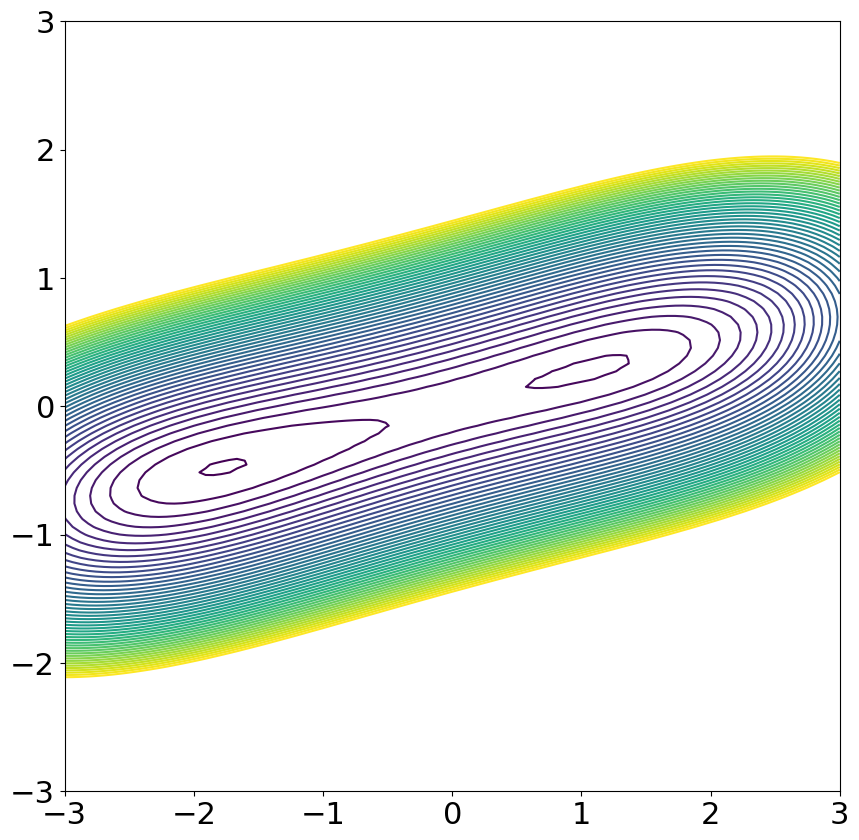

In [27]:
plot_loss_and_steps(L_func=loss2, positions=[])

In [28]:
##The minima are at approximately (-2.1,-0.5) and (1,0)

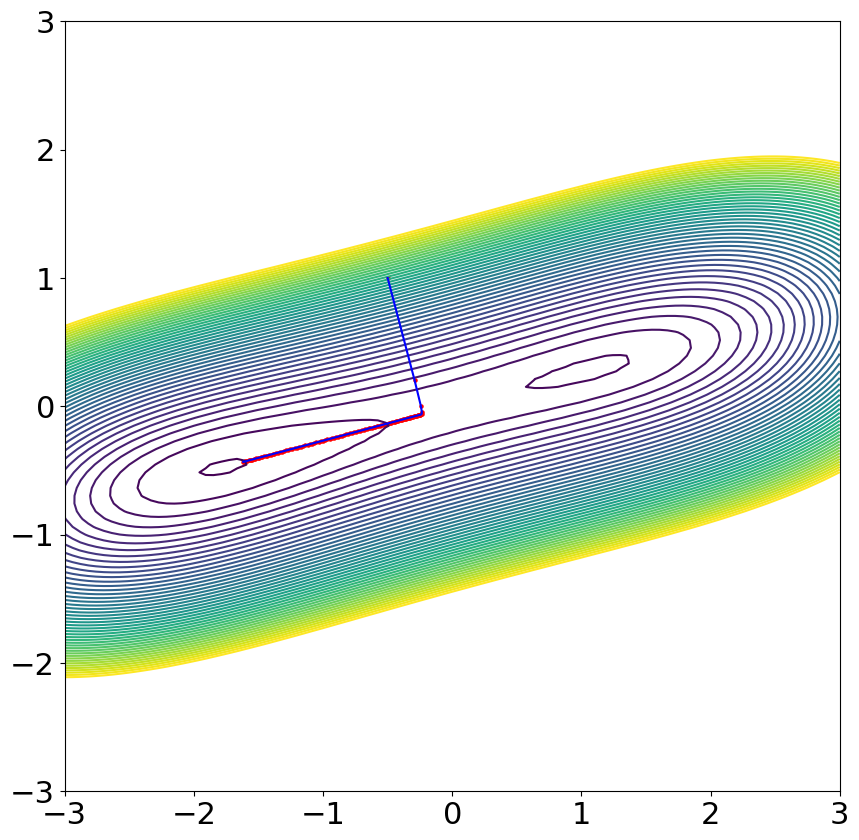

In [29]:
plot_loss_and_steps(L_func=loss2, positions= do_grad_desc(p0 = (-0.5, 1.0), L_grad_func=loss2_grad, eta=0.05, n_steps=120))

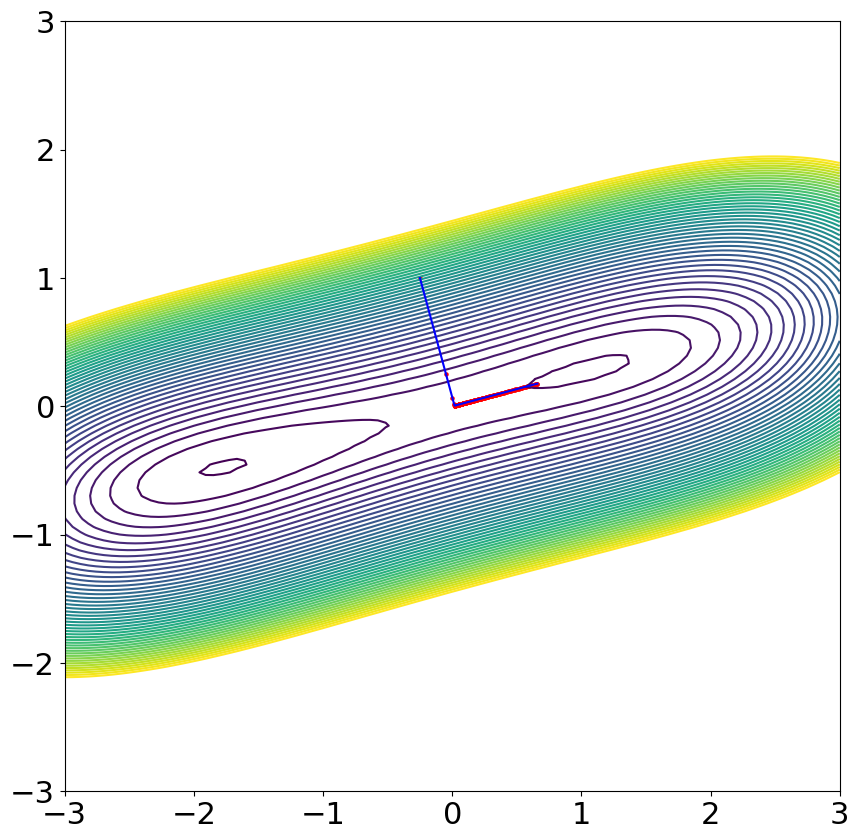

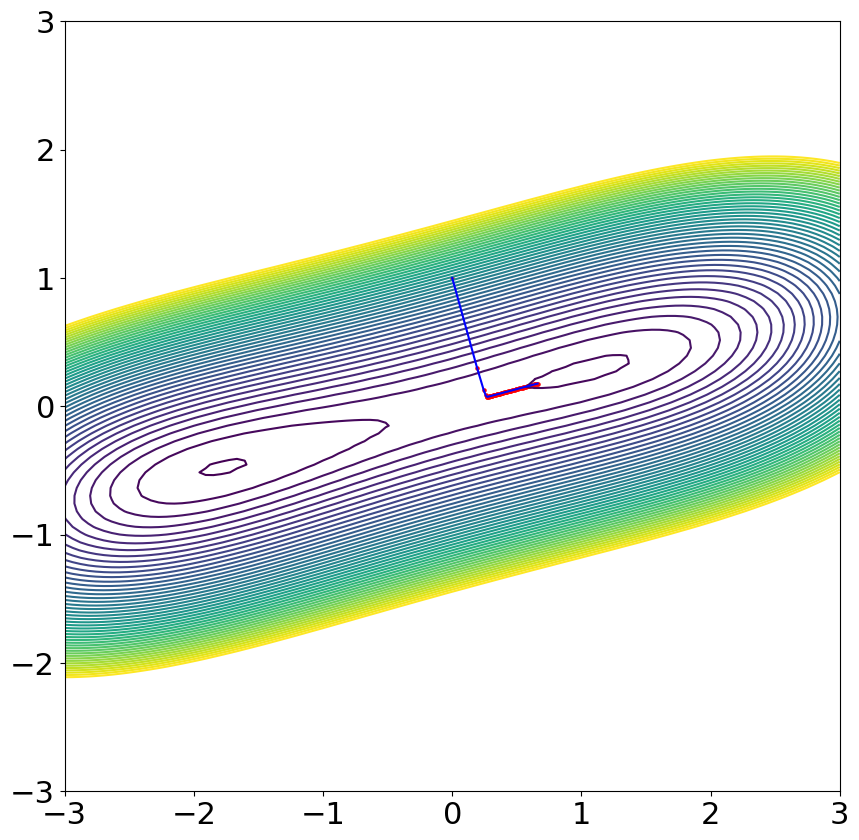

In [30]:
plot_loss_and_steps(L_func=loss2, positions= do_grad_desc(p0 = (-0.25, 1.0), L_grad_func=loss2_grad, eta=0.05, n_steps=210))
plot_loss_and_steps(L_func=loss2, positions= do_grad_desc(p0 = (0.0, 1.0), L_grad_func=loss2_grad, eta=0.05, n_steps=68))

##There are 2 local minima. The minimum on the right is more shallow than the one on the left. Our initial guess of position affects the behavior of this convergence and this makes it much harder to find the global minimum.

#Part 2

In [31]:
from sklearn.datasets import load_iris
d = load_iris()

print(d.keys(),'\n\n')

print('Description:', d['DESCR'])
print('Feature names:', d['feature_names'])


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 


Description: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

X = d.data
y = d.target
y = y.reshape(-1, 1)

np.random.seed(5)

featuresfit_data, featurestest_data, targetfit_data, targettest_data = train_test_split(X,y, test_size = 0.33)

print(featuresfit_data.shape)
print(featurestest_data.shape)
print(targetfit_data.shape)
print(targettest_data.shape)


(100, 4)
(50, 4)
(100, 1)
(50, 1)


In [33]:
from pickle import FALSE

features_fit = featuresfit_data[:,[0,2]]
test_features = featurestest_data[:,[0,2]]

fit_target = (targetfit_data == 1)


test_target = (targettest_data == 1)

target_is_versicolor = fit_target.astype(int)
target_is_notversicolor = test_target.astype(int)


In [34]:
from sklearn.linear_model import LogisticRegression

model_lin = LogisticRegression()

model_lin.fit(features_fit, target_is_versicolor)

print('Test data:', model_lin.score(test_features, target_is_notversicolor))

Test data: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


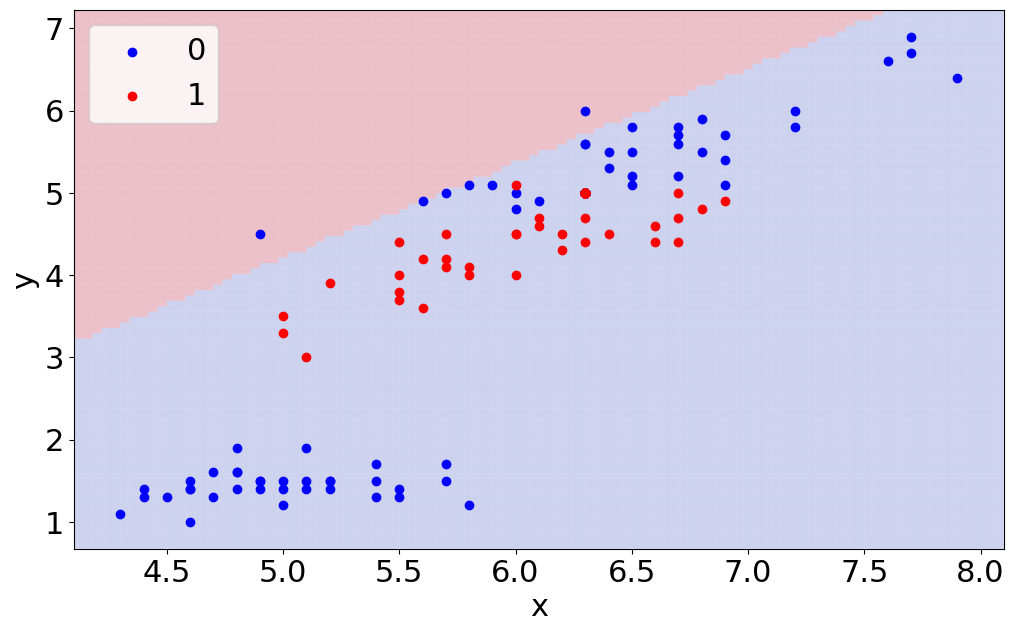

In [35]:
def plot_2d_data_and_prediction(model, features, target):
  """scatterplot data and plot prediction on regular grid
  Parameters
  ----------
  model: sklearn model object
  features: n_samples x 2 features array
  target: n_samples long integer array, all values 0 or 1
  """

  fig, ax = plt.subplots(figsize=figsize)

  # find where target is 0 or 1
  target_is_0 = np.where(target == 0)
  target_is_1 = np.where(target == 1)

  # scatterplot the two subsets
  ax.scatter(features[target_is_0, 0], features[target_is_0, 1], label='0', color='blue')
  ax.scatter(features[target_is_1, 0], features[target_is_1, 1], label='1', color='red')

  # make a grid to predict on
  xrange = ax.get_xlim()
  yrange = ax.get_ylim()
  xgrid, ygrid = np.meshgrid(np.linspace(xrange[0], xrange[1], 100), np.linspace(yrange[0], yrange[1], 100))
  # transform grid positions into n_grid_pts x 2 array for prediction
  pos = np.stack([xgrid.ravel(), ygrid.ravel()]).T
  # do predictions
  pred_classes = model.predict(pos).reshape(xgrid.shape)
  # plot (more convenient syntax than imshow)
  ax.pcolor(xgrid, ygrid, pred_classes, zorder=0, cmap='coolwarm', edgecolors=None, alpha=0.25)

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend()
  fig.show()
plot_2d_data_and_prediction(model_lin, features_fit, target_is_versicolor)



##The test data has a value of 0.64. Looking at the plot, we can see that the logistic regression model does not predict the classifications well. Therefore, I would not say that this model is good.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


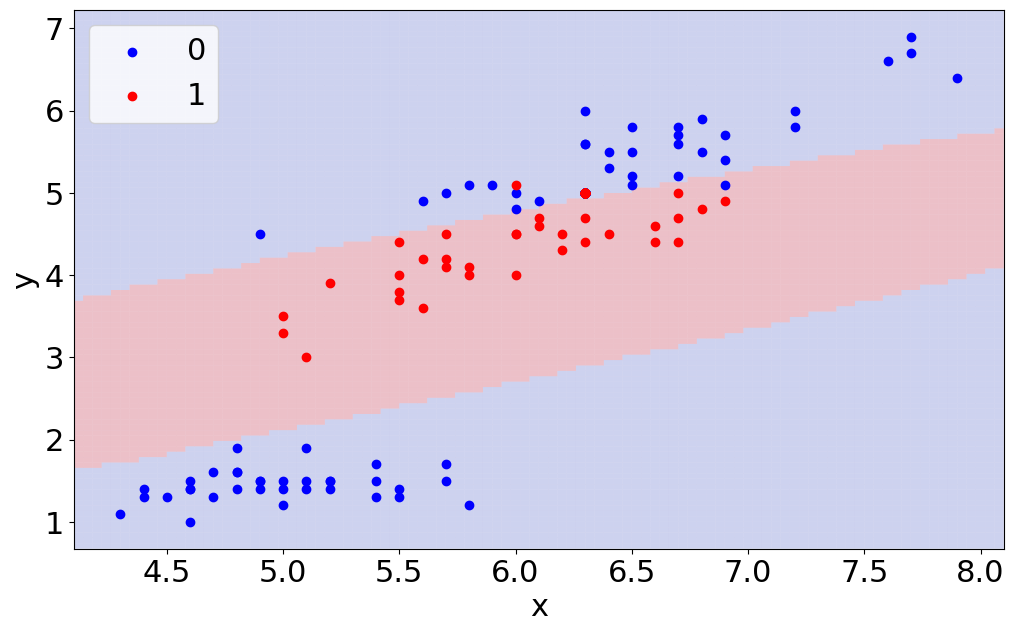

In [53]:
from sklearn.pipeline import make_pipeline

pf = PolynomialFeatures(2)
p = make_pipeline(pf, LogisticRegression())
p.fit(features_fit, target_is_versicolor)

print(pf.get_feature_names_out())

plot_2d_data_and_prediction(p, features_fit, target_is_versicolor)

In [54]:

print('Test data:', p.score(test_features, target_is_notversicolor))

Test data: 0.92


## The fraction of correct predictions (True positives and true negatives) are much higher in the model that uses polynomial features. I suggest that this model scores higher than the logistic regression model prediction becuase polynomial functions of features increases dimensionality and model flexibility.

In [75]:

model = LogisticRegression()

model.fit(featuresfit_data, targetfit_data)

print('Test data:', model.score(featurestest_data, targettest_data))


Test data: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## The models that fit to the 2-features had a lower score than the logistic regression model without polynomial features.